In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('npf_train.csv')

df = df.sample(frac=1).reset_index(drop=True)

class2 = np.array(["event"]*df.shape[0],dtype="object")
class2[df["class4"]=="nonevent"] = "nonevent"
df["class2"] = class2
df["class2"] = df["class2"].astype("category")

not_needed_columns = ["partlybad", "id", "date"]
df = df.drop(not_needed_columns, axis=1)

In [3]:
class2_categories = {
    "nonevent": 0,
    "event": 1
}

class4_categories = {
    "nonevent": 0,
    "Ia": 1,
    "Ib": 2,
    "II": 3
}

def categorize_class2(row):
    row["class2"] = class2_categories[row["class2"]]
    
    return row
def categorize_class4(row):
    row["class4"] = class4_categories[row["class4"]]
    
    return row

df = df.apply(lambda row: categorize_class2(row), axis=1)
df = df.apply(lambda row: categorize_class4(row), axis=1)
df["class2"] = df["class2"].astype("category")
df["class4"] = df["class4"].astype("category")

In [4]:
df["class4"].unique()

[0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]

In [5]:
df.shape

(458, 102)

In [6]:
df.describe()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,...,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,380.996307,3.509202,381.014152,3.295570,381.906526,4.290148,380.913345,3.094905,193.287920,145.571635,...,6.311782,1.652786,6.898868,1.987094,10.961236,7.845917,0.451261,0.391348,0.003050,0.000659
std,10.897068,3.433711,10.878318,3.192464,10.482752,4.290241,10.900973,2.918037,126.058537,94.362871,...,9.680534,0.972092,9.744430,1.172087,6.633754,5.042478,0.319151,0.289645,0.002257,0.000572
min,356.526871,0.053968,356.796486,0.048990,359.795102,0.152663,356.841429,0.037417,3.719434,1.997962,...,-23.288234,0.066700,-22.659083,0.069879,0.295780,0.174813,0.005346,0.003261,0.000227,0.000027
25%,373.001701,1.085523,373.016258,1.016582,374.129292,1.222415,372.921420,1.004862,71.773357,54.867997,...,-1.298557,0.833480,-0.661579,0.888506,4.937496,2.890366,0.137491,0.103036,0.001500,0.000275
50%,380.102616,2.384334,380.101303,2.246497,380.973091,2.714247,380.113959,2.137779,197.939217,156.529795,...,7.320084,1.696258,7.917160,2.027125,11.702413,8.390743,0.438305,0.391399,0.002475,0.000491
75%,388.480984,4.956735,388.505367,4.645716,389.003091,6.286882,388.296775,4.376801,304.162015,230.776779,...,13.964999,2.359977,14.549644,2.878753,16.727710,12.289556,0.700794,0.623115,0.004176,0.000829
max,411.345970,20.960630,411.360294,19.351218,411.014925,27.656008,411.348676,17.384845,449.450545,309.124047,...,25.684185,5.124718,25.897075,5.422549,22.560576,16.692785,1.242857,1.074115,0.019094,0.003658


### Normalize

In [7]:
from sklearn import preprocessing
X = df.drop(["class2", "class4"], axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns = df.drop(["class2", "class4"], axis=1).columns )

df = pd.concat([X_scaled, df[["class4", "class2"]]], axis = 1)

In [8]:
df.head()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class4,class2
0,0.208421,-0.890252,0.206957,-0.890354,0.147690,-0.887123,0.214161,-0.907991,-1.430598,-1.461511,...,-0.864683,-1.169255,-1.461451,-1.431945,-1.337632,-1.305829,-1.094984,-0.828365,0,0
1,-1.602694,-0.346228,-1.586691,-0.357837,-1.717430,-0.375729,-1.565415,-0.317990,0.637192,0.318578,...,0.109567,0.078662,0.293172,0.045178,0.058681,-0.109373,-0.831991,-0.644264,1,1
2,0.282145,-0.283872,0.293441,-0.259411,0.219114,-0.411356,0.306088,-0.227304,-0.145047,-0.436800,...,-0.689377,0.123559,-0.427813,-0.603430,-0.424726,-0.604096,-1.108729,-0.798429,2,1
3,-0.944909,-0.283870,-0.927903,-0.241756,-0.989968,-0.035062,-0.908061,-0.186649,1.692567,1.256199,...,0.623316,1.868850,1.527741,1.312116,1.142290,1.091565,-0.098527,0.100504,2,1
4,-0.807528,0.000910,-0.815402,0.060382,-0.831560,-0.140304,-0.812886,0.132256,-1.007809,-0.930766,...,0.656566,-1.169649,-0.875141,-0.755413,-0.695912,-0.628495,-0.528384,-0.227670,0,0


# Correlations

In [9]:
import pandas as pd

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10000):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [10]:
print("Top Correlations of features")
correlations = get_top_abs_correlations(df.drop(["class4", "class2"], axis=1), 10)
print(correlations)

Top Correlations of features
H2O336.mean  H2O504.mean    0.999952
H2O42.mean   H2O84.mean     0.999919
T504.mean    T672.mean      0.999911
H2O504.mean  H2O672.mean    0.999906
H2O168.mean  H2O336.mean    0.999905
T42.mean     T84.mean       0.999900
H2O168.mean  H2O84.mean     0.999895
T168.mean    T84.mean       0.999890
H2O336.mean  H2O672.mean    0.999798
T168.mean    T504.mean      0.999756
dtype: float64


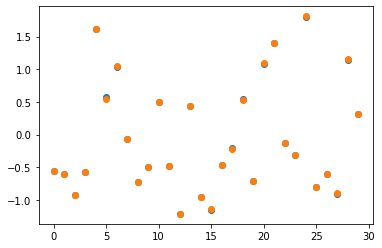

In [11]:
amount = 30
plt.scatter(df.index[0:amount], df["H2O336.mean"][0:amount], label="Moi")
plt.scatter(df.index[0:amount], df["H2O504.mean"][0:amount])

In [12]:
cor_matrix = df.drop(["class2", "class4"], axis=1).corr().abs()

In [13]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [14]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]

In [15]:
df_corr_dropped = df.drop(to_drop, axis=1)

In [16]:
df_corr_dropped.head()

,CO2168.mean,CO2168.std,Glob.mean,H2O168.std,NO168.mean,NO168.std,NO42.std,NOx168.std,NOx336.std,NOx42.std,...,PTG.mean,PTG.std,SO2168.mean,SO2168.std,SWS.mean,SWS.std,CS.mean,CS.std,class4,class2
0,0.208421,-0.890252,-1.430598,-0.706568,-0.544037,-0.607336,-0.457829,-0.728707,-0.730405,-0.648675,...,-0.026240,-1.392985,-0.505912,-0.711820,0.577274,-0.522151,-1.094984,-0.828365,0,0
1,-1.602694,-0.346228,0.637192,0.039558,-0.541008,-0.713698,-0.416532,-0.796720,-0.844003,-0.632937,...,-0.869128,-0.246067,-0.446140,-0.308412,0.660617,-0.537016,-0.831991,-0.644264,1,1
2,0.282145,-0.283872,-0.145047,-1.004941,0.137984,-0.112578,-0.193208,-0.347832,-0.341124,-0.402952,...,-0.513026,-0.336631,-0.641815,-0.643247,0.247495,-0.515938,-1.108729,-0.798429,2,1
3,-0.944909,-0.283870,1.692567,0.650338,-0.233605,-0.312695,-0.358227,-0.207029,0.022283,-0.312080,...,-0.660047,0.789500,-0.345980,-0.187265,0.719694,-0.534497,-0.098527,0.100504,2,1
4,-0.807528,0.000910,-1.007809,-0.328429,-0.117522,-0.373707,-0.394171,-0.319130,-0.326255,-0.381276,...,-0.014469,-1.264863,-0.614797,-0.757770,-3.024932,3.363084,-0.528384,-0.227670,0,0


### Outliers

In [17]:
from scipy import stats
z = np.abs(stats.zscore(df_corr_dropped))
threshold = 3

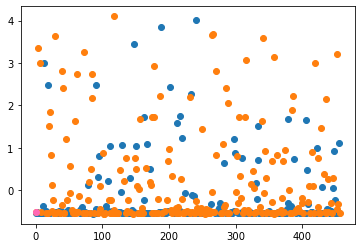

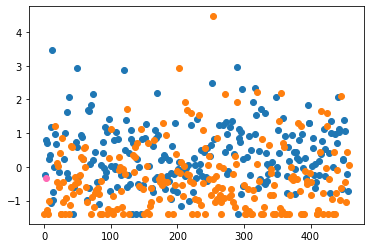

In [18]:
events_indexes = df_corr_dropped[df_corr_dropped['class2'] == 1].index
non_events_indexes = df_corr_dropped[df_corr_dropped['class2'] == 0].index

rows, cols = np.where(z > threshold)
cols_seen = []
row_i = 0
for col in cols[1:4]:
    col_seen = col in cols_seen
    if col_seen:
        row_i = row_i + 1
        continue
    cols_seen.append(col)
    events_indexes = list(df_corr_dropped[df_corr_dropped['class2'] == 1].index)
    non_events_indexes = list(df_corr_dropped[df_corr_dropped['class2'] == 0].index)
    try:
        events_indexes.remove(row_i)
        non_events_indexes.remove(row_i)
    except:
        None
    plt.figure()
    plt.scatter(events_indexes, df_corr_dropped.iloc[events_indexes, col])
    plt.scatter(non_events_indexes, df_corr_dropped.iloc[non_events_indexes, col])
    plt.scatter([row_i], df_corr_dropped.iloc[[row_i], col], color = 'hotpink')
    plt.plot()
    row_i = row_i + 1


In [19]:
Q1 = df_corr_dropped.quantile(0.25)
Q3 = df_corr_dropped.quantile(0.75)
IQR = Q3 - Q1

df_corr_dropped_outlier_dropped = df_corr_dropped[(z < threshold).all(axis=1)]


### Manual selection

In [20]:
import re

selected_columns = []
for column in df.drop(["class2", "class4"], axis=1).columns:
    splitted = column.split(".")
    column_name = splitted[0]
    column_name_without_number = re.findall('([a-zA-Z ]*)\d*.*', column_name)
    seen = False
    
    for selected_column in selected_columns:
        splitted = selected_column.split(".")
        name = splitted[0]
        unit = splitted[1]
        name_without_number = re.findall('([a-zA-Z ]*)\d*.*', name)
        
        if column_name_without_number == name_without_number:
            seen = True
            break
    
    if not seen:
        selected_columns.append(column)
        selected_columns.append(f"{column_name}.std")
selected_columns = selected_columns + ["class4", "class2"]
df_manually_selected = df[selected_columns]

In [21]:
df_manually_selected.head()

,CO2168.mean,CO2168.std,Glob.mean,Glob.std,H2O168.mean,H2O168.std,NET.mean,NET.std,NO168.mean,NO168.std,...,SWS.mean,SWS.std,T168.mean,T168.std,UV_A.mean,UV_A.std,CS.mean,CS.std,class4,class2
0,0.208421,-0.890252,-1.430598,-1.461511,-0.553462,-0.706568,-1.498796,-1.415306,-0.544037,-0.607336,...,0.577274,-0.522151,-0.857163,-1.126970,-1.461451,-1.431945,-1.094984,-0.828365,0,0
1,-1.602694,-0.346228,0.637192,0.318578,-0.598722,0.039558,0.300762,0.312331,-0.541008,-0.713698,...,0.660617,-0.537016,0.099912,0.113470,0.293172,0.045178,-0.831991,-0.644264,1,1
2,0.282145,-0.283872,-0.145047,-0.436800,-0.929302,-1.004941,-0.565290,-0.347724,0.137984,-0.112578,...,0.247495,-0.515938,-0.682779,0.235834,-0.427813,-0.603430,-1.108729,-0.798429,2,1
3,-0.944909,-0.283870,1.692567,1.256199,-0.568394,0.650338,1.644145,1.234464,-0.233605,-0.312695,...,0.719694,-0.534497,0.621573,1.877149,1.527741,1.312116,-0.098527,0.100504,2,1
4,-0.807528,0.000910,-1.007809,-0.930766,1.599569,-0.328429,-0.789150,-0.925932,-0.117522,-0.373707,...,-3.024932,3.363084,0.667909,-1.160597,-0.875141,-0.755413,-0.528384,-0.227670,0,0


# Test some models

In [22]:
# df = df.sample(frac=1).reset_index(drop=True)

datasets = []
datasets.append({"name": "original", "dataset": df})
datasets.append({"name": "cor_dropped", "dataset": df_corr_dropped})
datasets.append({"name": "cor_out_dropped", "dataset": df_corr_dropped_outlier_dropped})
datasets.append({"name": "manual", "dataset": df_manually_selected})

In [23]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = []

model1 = {
    "model": svm.SVC(),
    "params": {
        "kernel":'linear', 
        "C":1, 
        "random_state":0
    }
}

models.append(model1)

model2 = {
    "model": LogisticRegression(),
    "params": {
        "random_state":0,
        "solver": 'lbfgs'
    }
}

models.append(model2)

model3 = {
    "model": DecisionTreeClassifier(),
    "params": {
        "random_state":0
    }
}

models.append(model3)

model4 = {
    "model": RandomForestClassifier(),
    "params": {
        "random_state":0
    }
}
models.append(model4)

model5 = {
    "model": KNeighborsClassifier(),
    "params": {
        "n_neighbors":10
    }
}
models.append(model5)

model6 = {
    "model": GaussianNB(),
    "params": {
    }
}
models.append(model6)

In [24]:
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
initial_result = {}
result_df = pd.DataFrame(data=initial_result)

y_col = "class2"

for dataset_object in datasets:
    dataset=dataset_object["dataset"]
    X_cols = list(filter(lambda col: col != "class2" and col != "class4", dataset.columns))
    train_set_length = int(round(len(dataset)*1, 0))
    
    X_train = dataset[X_cols][0:train_set_length]
    y_train = dataset[y_col][0:train_set_length]
    
    t = SelectKBest(mutual_info_classif, k=10).fit_transform(X_train, y_train)
    
    # X_test = dataset[X_cols][train_set_length:len(dataset)]
    # y_test = dataset[y_col][train_set_length:len(dataset)]
    
    for model in models:
        clf = model["model"]
        params = model["params"]
        clf.set_params(**params)
        
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        cv_score = scores.mean()
        
        # clf.fit(X_train, y_train)
        # y_pred = clf.predict(X_test)
        # y_true = y_test
        # test_acc = accuracy_score(y_true, y_pred)
        
        new_result_row = { 
            "model": type(clf).__name__, 
            "model_params": params,
            "df_name": dataset_object["name"],
            "dataset_columns": list(X_train.columns), 
            "dataset_columns_length": len(list(X_train.columns)),
            "cv_acc": cv_score,
            "train_set_size": train_set_length
        }
        result_df = result_df.append(new_result_row, ignore_index=True)

C:\Users\ossij\anaconda3\envs\intro-ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ossij\anaconda3\envs\intro-ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [25]:
result_df.sort_values(by=["cv_acc"], ascending=False)

,cv_acc,dataset_columns,dataset_columns_length,df_name,model,model_params,train_set_size
1,0.864879,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,original,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",458.0
3,0.864831,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,original,RandomForestClassifier,{'random_state': 0},458.0
19,0.862802,"[CO2168.mean, CO2168.std, Glob.mean, Glob.std,...",36.0,manual,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",458.0
18,0.860483,"[CO2168.mean, CO2168.std, Glob.mean, Glob.std,...",36.0,manual,SVC,"{'kernel': 'linear', 'C': 1, 'random_state': 0}",458.0
21,0.860386,"[CO2168.mean, CO2168.std, Glob.mean, Glob.std,...",36.0,manual,RandomForestClassifier,{'random_state': 0},458.0
22,0.849420,"[CO2168.mean, CO2168.std, Glob.mean, Glob.std,...",36.0,manual,KNeighborsClassifier,{'n_neighbors': 10},458.0
4,0.840725,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,original,KNeighborsClassifier,{'n_neighbors': 10},458.0
0,0.838744,"[CO2168.mean, CO2168.std, CO2336.mean, CO2336....",100.0,original,SVC,"{'kernel': 'linear', 'C': 1, 'random_state': 0}",458.0
13,0.835556,"[CO2168.mean, CO2168.std, Glob.mean, H2O168.st...",23.0,cor_out_dropped,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",359.0
7,0.834203,"[CO2168.mean, CO2168.std, Glob.mean, H2O168.st...",23.0,cor_dropped,LogisticRegression,"{'random_state': 0, 'solver': 'lbfgs'}",458.0


In [28]:
from sklearn.model_selection import GridSearchCV
dataset = df_manually_selected
X_cols = list(filter(lambda col: col != "class2" and col != "class4", dataset.columns))
parameters = {'n_neighbors': range(1, 20)}
X_train = dataset[X_cols][0:train_set_length]
y_train = dataset["class2"]
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)

clf.fit(X_train, y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [30]:
means = clf.cv_results_["mean_test_score"]
print(means)
stds = clf.cv_results_["std_test_score"]

[0.82759197 0.78394649 0.82534639 0.81877688 0.83628763 0.83189202
 0.84500717 0.84718108 0.84718108 0.85379838 0.84725275 0.84507883
 0.84288103 0.82978978 0.82322026 0.82981366 0.83423316 0.83203536
 0.82768753]
